In [229]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
train = pd.read_csv("train_data.csv")  
test = pd.read_csv("test_data.csv")    

# Target Variable
target = train["purchaseValue"]
train.drop(columns=["purchaseValue"], inplace=True)


df= pd.concat([train, test], axis=0)

In [230]:
df.head()

,trafficSource.isTrueDirect,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,device.mobileInputSelector,...,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,False,1.0


In [231]:
df.shape

(145029, 51)

In [232]:
columns_to_drop = [
    'trafficSource.adwordsClickInfo.isVideoAd',
    'trafficSource.isTrueDirect',
    'totals.bounces',
    'new_visits',
    'trafficSource.adwordsClickInfo.slot',
    'trafficSource.adwordsClickInfo.adNetworkType',
    'trafficSource.adwordsClickInfo.page',
    'trafficSource.adContent',
    'trafficSource.referralPath',
    'trafficSource.keyword'
]

cleaned_df = df.drop(columns=columns_to_drop)

In [233]:
cleaned_df

,browser,device.screenResolution,screenSize,geoCluster,device.mobileDeviceBranding,device.mobileInputSelector,userId,trafficSource.campaign,device.mobileDeviceMarketingName,geoNetwork.networkDomain,...,date,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile
0,Edge,not available in demo dataset,medium,Region_2,not available in demo dataset,not available in demo dataset,61421,(not set),not available in demo dataset,domain1,...,20170714,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False
1,Chrome,not available in demo dataset,medium,Region_3,not available in demo dataset,not available in demo dataset,72287,(not set),not available in demo dataset,domain3,...,20170519,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False
2,Chrome,not available in demo dataset,medium,Region_2,not available in demo dataset,not available in demo dataset,25180,(not set),not available in demo dataset,domain1,...,20171020,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False
3,Internet Explorer,not available in demo dataset,medium,Region_4,not available in demo dataset,not available in demo dataset,41295,(not set),not available in demo dataset,domain3,...,20170103,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False
4,Chrome,not available in demo dataset,medium,Region_3,not available in demo dataset,not available in demo dataset,113697,(not set),not available in demo dataset,domain1,...,20161006,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29001,Chrome,not available in demo dataset,medium,Region_2,not available in demo dataset,not available in demo dataset,86392,(not set),not available in demo dataset,domain2,...,20160930,not available in demo dataset,desktop,Organic Search,not available in demo dataset,1,not available in demo dataset,1475230692,Americas,False
29002,Chrome,not available in demo dataset,medium,Region_2,not available in demo dataset,not available in demo dataset,67605,(not set),not available in demo dataset,domain2,...,20170223,not available in demo dataset,desktop,Organic Search,not available in demo dataset,78,not available in demo dataset,1487866306,Americas,False
29003,Chrome,not available in demo dataset,medium,Region_1,not available in demo dataset,not available in demo dataset,22655,(not set),not available in demo dataset,domain1,...,20161215,not available in demo dataset,desktop,Paid Search,not available in demo dataset,37,not available in demo dataset,1481853232,Americas,False
29004,Chrome,not available in demo dataset,medium,Region_3,not available in demo dataset,not available in demo dataset,47126,(not set),not available in demo dataset,domain3,...,20161213,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1481682985,Americas,False


In [234]:
cleaned_df['pageViews'] = cleaned_df['pageViews'].fillna(cleaned_df['pageViews'].median())

In [235]:
cleaned_df

,browser,device.screenResolution,screenSize,geoCluster,device.mobileDeviceBranding,device.mobileInputSelector,userId,trafficSource.campaign,device.mobileDeviceMarketingName,geoNetwork.networkDomain,...,date,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile
0,Edge,not available in demo dataset,medium,Region_2,not available in demo dataset,not available in demo dataset,61421,(not set),not available in demo dataset,domain1,...,20170714,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False
1,Chrome,not available in demo dataset,medium,Region_3,not available in demo dataset,not available in demo dataset,72287,(not set),not available in demo dataset,domain3,...,20170519,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False
2,Chrome,not available in demo dataset,medium,Region_2,not available in demo dataset,not available in demo dataset,25180,(not set),not available in demo dataset,domain1,...,20171020,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False
3,Internet Explorer,not available in demo dataset,medium,Region_4,not available in demo dataset,not available in demo dataset,41295,(not set),not available in demo dataset,domain3,...,20170103,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False
4,Chrome,not available in demo dataset,medium,Region_3,not available in demo dataset,not available in demo dataset,113697,(not set),not available in demo dataset,domain1,...,20161006,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29001,Chrome,not available in demo dataset,medium,Region_2,not available in demo dataset,not available in demo dataset,86392,(not set),not available in demo dataset,domain2,...,20160930,not available in demo dataset,desktop,Organic Search,not available in demo dataset,1,not available in demo dataset,1475230692,Americas,False
29002,Chrome,not available in demo dataset,medium,Region_2,not available in demo dataset,not available in demo dataset,67605,(not set),not available in demo dataset,domain2,...,20170223,not available in demo dataset,desktop,Organic Search,not available in demo dataset,78,not available in demo dataset,1487866306,Americas,False
29003,Chrome,not available in demo dataset,medium,Region_1,not available in demo dataset,not available in demo dataset,22655,(not set),not available in demo dataset,domain1,...,20161215,not available in demo dataset,desktop,Paid Search,not available in demo dataset,37,not available in demo dataset,1481853232,Americas,False
29004,Chrome,not available in demo dataset,medium,Region_3,not available in demo dataset,not available in demo dataset,47126,(not set),not available in demo dataset,domain3,...,20161213,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1481682985,Americas,False


In [236]:
cleaned_df.dtypes

browser                              object
device.screenResolution              object
screenSize                           object
geoCluster                           object
device.mobileDeviceBranding          object
device.mobileInputSelector           object
userId                                int64
trafficSource.campaign               object
device.mobileDeviceMarketingName     object
geoNetwork.networkDomain             object
gclIdPresent                          int64
device.operatingSystemVersion        object
sessionNumber                         int64
device.flashVersion                  object
geoNetwork.region                    object
trafficSource                        object
totals.visits                         int64
geoNetwork.networkLocation           object
sessionId                             int64
os                                   object
geoNetwork.subContinent              object
trafficSource.medium                 object
browserMajor                    

In [237]:
cleaned_df.shape

(145029, 41)

In [238]:
# Drop constant columns
cleaned_df.drop(columns=['device.screenResolution', 'screenSize'], inplace=True)

In [239]:
# Find columns with only one unique value (constant columns)
constant_columns = [col for col in cleaned_df.columns if cleaned_df[col].nunique(dropna=False) == 1]

print("Constant columns (only 1 unique value):")
print(constant_columns)

Constant columns (only 1 unique value):
['device.mobileDeviceBranding', 'device.mobileInputSelector', 'device.mobileDeviceMarketingName', 'device.operatingSystemVersion', 'device.flashVersion', 'totals.visits', 'geoNetwork.networkLocation', 'browserMajor', 'device.browserSize', 'socialEngagementType', 'locationZone', 'device.mobileDeviceModel', 'device.language', 'device.browserVersion', 'device.screenColors']


In [240]:
cleaned_df

,browser,geoCluster,device.mobileDeviceBranding,device.mobileInputSelector,userId,trafficSource.campaign,device.mobileDeviceMarketingName,geoNetwork.networkDomain,gclIdPresent,device.operatingSystemVersion,...,date,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile
0,Edge,Region_2,not available in demo dataset,not available in demo dataset,61421,(not set),not available in demo dataset,domain1,0,not available in demo dataset,...,20170714,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False
1,Chrome,Region_3,not available in demo dataset,not available in demo dataset,72287,(not set),not available in demo dataset,domain3,0,not available in demo dataset,...,20170519,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False
2,Chrome,Region_2,not available in demo dataset,not available in demo dataset,25180,(not set),not available in demo dataset,domain1,0,not available in demo dataset,...,20171020,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False
3,Internet Explorer,Region_4,not available in demo dataset,not available in demo dataset,41295,(not set),not available in demo dataset,domain3,0,not available in demo dataset,...,20170103,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False
4,Chrome,Region_3,not available in demo dataset,not available in demo dataset,113697,(not set),not available in demo dataset,domain1,0,not available in demo dataset,...,20161006,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29001,Chrome,Region_2,not available in demo dataset,not available in demo dataset,86392,(not set),not available in demo dataset,domain2,0,not available in demo dataset,...,20160930,not available in demo dataset,desktop,Organic Search,not available in demo dataset,1,not available in demo dataset,1475230692,Americas,False
29002,Chrome,Region_2,not available in demo dataset,not available in demo dataset,67605,(not set),not available in demo dataset,domain2,0,not available in demo dataset,...,20170223,not available in demo dataset,desktop,Organic Search,not available in demo dataset,78,not available in demo dataset,1487866306,Americas,False
29003,Chrome,Region_1,not available in demo dataset,not available in demo dataset,22655,(not set),not available in demo dataset,domain1,1,not available in demo dataset,...,20161215,not available in demo dataset,desktop,Paid Search,not available in demo dataset,37,not available in demo dataset,1481853232,Americas,False
29004,Chrome,Region_3,not available in demo dataset,not available in demo dataset,47126,(not set),not available in demo dataset,domain3,0,not available in demo dataset,...,20161213,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1481682985,Americas,False


In [241]:
cleaned_df['device.isMobile'] = cleaned_df['device.isMobile'].astype(int)

In [242]:
cleaned_df['geoNetwork.metro'] = cleaned_df['geoNetwork.metro'].replace('not set', 'not available in demo dataset')

In [243]:
cleaned_df.drop('trafficSource.campaign', axis=1, inplace=True)

In [244]:
cleaned_df

,browser,geoCluster,device.mobileDeviceBranding,device.mobileInputSelector,userId,device.mobileDeviceMarketingName,geoNetwork.networkDomain,gclIdPresent,device.operatingSystemVersion,sessionNumber,...,date,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile
0,Edge,Region_2,not available in demo dataset,not available in demo dataset,61421,not available in demo dataset,domain1,0,not available in demo dataset,1,...,20170714,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,0
1,Chrome,Region_3,not available in demo dataset,not available in demo dataset,72287,not available in demo dataset,domain3,0,not available in demo dataset,1,...,20170519,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,0
2,Chrome,Region_2,not available in demo dataset,not available in demo dataset,25180,not available in demo dataset,domain1,0,not available in demo dataset,2,...,20171020,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,0
3,Internet Explorer,Region_4,not available in demo dataset,not available in demo dataset,41295,not available in demo dataset,domain3,0,not available in demo dataset,1,...,20170103,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,0
4,Chrome,Region_3,not available in demo dataset,not available in demo dataset,113697,not available in demo dataset,domain1,0,not available in demo dataset,1,...,20161006,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29001,Chrome,Region_2,not available in demo dataset,not available in demo dataset,86392,not available in demo dataset,domain2,0,not available in demo dataset,16,...,20160930,not available in demo dataset,desktop,Organic Search,not available in demo dataset,1,not available in demo dataset,1475230692,Americas,0
29002,Chrome,Region_2,not available in demo dataset,not available in demo dataset,67605,not available in demo dataset,domain2,0,not available in demo dataset,1,...,20170223,not available in demo dataset,desktop,Organic Search,not available in demo dataset,78,not available in demo dataset,1487866306,Americas,0
29003,Chrome,Region_1,not available in demo dataset,not available in demo dataset,22655,not available in demo dataset,domain1,1,not available in demo dataset,1,...,20161215,not available in demo dataset,desktop,Paid Search,not available in demo dataset,37,not available in demo dataset,1481853232,Americas,0
29004,Chrome,Region_3,not available in demo dataset,not available in demo dataset,47126,not available in demo dataset,domain3,0,not available in demo dataset,1,...,20161213,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1481682985,Americas,0


In [245]:
cleaned_df['geoNetwork.metro'] = cleaned_df['geoNetwork.metro'].replace('not set', 'not available in demo dataset')

In [246]:
cleaned_df

,browser,geoCluster,device.mobileDeviceBranding,device.mobileInputSelector,userId,device.mobileDeviceMarketingName,geoNetwork.networkDomain,gclIdPresent,device.operatingSystemVersion,sessionNumber,...,date,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile
0,Edge,Region_2,not available in demo dataset,not available in demo dataset,61421,not available in demo dataset,domain1,0,not available in demo dataset,1,...,20170714,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,0
1,Chrome,Region_3,not available in demo dataset,not available in demo dataset,72287,not available in demo dataset,domain3,0,not available in demo dataset,1,...,20170519,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,0
2,Chrome,Region_2,not available in demo dataset,not available in demo dataset,25180,not available in demo dataset,domain1,0,not available in demo dataset,2,...,20171020,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,0
3,Internet Explorer,Region_4,not available in demo dataset,not available in demo dataset,41295,not available in demo dataset,domain3,0,not available in demo dataset,1,...,20170103,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,0
4,Chrome,Region_3,not available in demo dataset,not available in demo dataset,113697,not available in demo dataset,domain1,0,not available in demo dataset,1,...,20161006,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29001,Chrome,Region_2,not available in demo dataset,not available in demo dataset,86392,not available in demo dataset,domain2,0,not available in demo dataset,16,...,20160930,not available in demo dataset,desktop,Organic Search,not available in demo dataset,1,not available in demo dataset,1475230692,Americas,0
29002,Chrome,Region_2,not available in demo dataset,not available in demo dataset,67605,not available in demo dataset,domain2,0,not available in demo dataset,1,...,20170223,not available in demo dataset,desktop,Organic Search,not available in demo dataset,78,not available in demo dataset,1487866306,Americas,0
29003,Chrome,Region_1,not available in demo dataset,not available in demo dataset,22655,not available in demo dataset,domain1,1,not available in demo dataset,1,...,20161215,not available in demo dataset,desktop,Paid Search,not available in demo dataset,37,not available in demo dataset,1481853232,Americas,0
29004,Chrome,Region_3,not available in demo dataset,not available in demo dataset,47126,not available in demo dataset,domain3,0,not available in demo dataset,1,...,20161213,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1481682985,Americas,0


In [247]:
cleaned_df.dtypes

browser                              object
geoCluster                           object
device.mobileDeviceBranding          object
device.mobileInputSelector           object
userId                                int64
device.mobileDeviceMarketingName     object
geoNetwork.networkDomain             object
gclIdPresent                          int64
device.operatingSystemVersion        object
sessionNumber                         int64
device.flashVersion                  object
geoNetwork.region                    object
trafficSource                        object
totals.visits                         int64
geoNetwork.networkLocation           object
sessionId                             int64
os                                   object
geoNetwork.subContinent              object
trafficSource.medium                 object
browserMajor                         object
locationCountry                      object
device.browserSize                   object
socialEngagementType            

In [248]:
cleaned_df.shape

(145029, 38)

In [249]:
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'], format='%Y%m%d')
cleaned_df['sessionStart'] = pd.to_datetime(cleaned_df['sessionStart'], unit='s')

# Extract features
cleaned_df['day'] = cleaned_df['date'].dt.day
cleaned_df['month'] = cleaned_df['date'].dt.month
cleaned_df['weekday'] = cleaned_df['date'].dt.weekday
cleaned_df['hour'] = cleaned_df['sessionStart'].dt.hour

In [250]:
cleaned_df

,browser,geoCluster,device.mobileDeviceBranding,device.mobileInputSelector,userId,device.mobileDeviceMarketingName,geoNetwork.networkDomain,gclIdPresent,device.operatingSystemVersion,sessionNumber,...,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,day,month,weekday,hour
0,Edge,Region_2,not available in demo dataset,not available in demo dataset,61421,not available in demo dataset,domain1,0,not available in demo dataset,1,...,not available in demo dataset,1,not available in demo dataset,2017-07-15 06:39:59,Americas,0,14,7,4,6
1,Chrome,Region_3,not available in demo dataset,not available in demo dataset,72287,not available in demo dataset,domain3,0,not available in demo dataset,1,...,not available in demo dataset,1,not available in demo dataset,2017-05-20 06:34:25,Americas,0,19,5,4,6
2,Chrome,Region_2,not available in demo dataset,not available in demo dataset,25180,not available in demo dataset,domain1,0,not available in demo dataset,2,...,not available in demo dataset,6,not available in demo dataset,2017-10-20 14:38:48,Europe,0,20,10,4,14
3,Internet Explorer,Region_4,not available in demo dataset,not available in demo dataset,41295,not available in demo dataset,domain3,0,not available in demo dataset,1,...,not available in demo dataset,1,not available in demo dataset,2017-01-03 08:23:58,Asia,0,3,1,1,8
4,Chrome,Region_3,not available in demo dataset,not available in demo dataset,113697,not available in demo dataset,domain1,0,not available in demo dataset,1,...,not available in demo dataset,66,not available in demo dataset,2016-10-07 01:43:53,Americas,0,6,10,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29001,Chrome,Region_2,not available in demo dataset,not available in demo dataset,86392,not available in demo dataset,domain2,0,not available in demo dataset,16,...,not available in demo dataset,1,not available in demo dataset,2016-09-30 10:18:12,Americas,0,30,9,4,10
29002,Chrome,Region_2,not available in demo dataset,not available in demo dataset,67605,not available in demo dataset,domain2,0,not available in demo dataset,1,...,not available in demo dataset,78,not available in demo dataset,2017-02-23 16:11:46,Americas,0,23,2,3,16
29003,Chrome,Region_1,not available in demo dataset,not available in demo dataset,22655,not available in demo dataset,domain1,1,not available in demo dataset,1,...,not available in demo dataset,37,not available in demo dataset,2016-12-16 01:53:52,Americas,0,15,12,3,1
29004,Chrome,Region_3,not available in demo dataset,not available in demo dataset,47126,not available in demo dataset,domain3,0,not available in demo dataset,1,...,not available in demo dataset,1,not available in demo dataset,2016-12-14 02:36:25,Americas,0,13,12,1,2


In [251]:
cleaned_df.shape

(145029, 42)

In [252]:
cleaned_df.dtypes

browser                                     object
geoCluster                                  object
device.mobileDeviceBranding                 object
device.mobileInputSelector                  object
userId                                       int64
device.mobileDeviceMarketingName            object
geoNetwork.networkDomain                    object
gclIdPresent                                 int64
device.operatingSystemVersion               object
sessionNumber                                int64
device.flashVersion                         object
geoNetwork.region                           object
trafficSource                               object
totals.visits                                int64
geoNetwork.networkLocation                  object
sessionId                                    int64
os                                          object
geoNetwork.subContinent                     object
trafficSource.medium                        object
browserMajor                   

In [253]:
cleaned_df.drop(['date', 'sessionStart'], axis=1, inplace=True)

In [254]:
cleaned_df

,browser,geoCluster,device.mobileDeviceBranding,device.mobileInputSelector,userId,device.mobileDeviceMarketingName,geoNetwork.networkDomain,gclIdPresent,device.operatingSystemVersion,sessionNumber,...,userChannel,device.browserVersion,totalHits,device.screenColors,geoNetwork.continent,device.isMobile,day,month,weekday,hour
0,Edge,Region_2,not available in demo dataset,not available in demo dataset,61421,not available in demo dataset,domain1,0,not available in demo dataset,1,...,Social,not available in demo dataset,1,not available in demo dataset,Americas,0,14,7,4,6
1,Chrome,Region_3,not available in demo dataset,not available in demo dataset,72287,not available in demo dataset,domain3,0,not available in demo dataset,1,...,Direct,not available in demo dataset,1,not available in demo dataset,Americas,0,19,5,4,6
2,Chrome,Region_2,not available in demo dataset,not available in demo dataset,25180,not available in demo dataset,domain1,0,not available in demo dataset,2,...,Organic Search,not available in demo dataset,6,not available in demo dataset,Europe,0,20,10,4,14
3,Internet Explorer,Region_4,not available in demo dataset,not available in demo dataset,41295,not available in demo dataset,domain3,0,not available in demo dataset,1,...,Social,not available in demo dataset,1,not available in demo dataset,Asia,0,3,1,1,8
4,Chrome,Region_3,not available in demo dataset,not available in demo dataset,113697,not available in demo dataset,domain1,0,not available in demo dataset,1,...,Direct,not available in demo dataset,66,not available in demo dataset,Americas,0,6,10,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29001,Chrome,Region_2,not available in demo dataset,not available in demo dataset,86392,not available in demo dataset,domain2,0,not available in demo dataset,16,...,Organic Search,not available in demo dataset,1,not available in demo dataset,Americas,0,30,9,4,10
29002,Chrome,Region_2,not available in demo dataset,not available in demo dataset,67605,not available in demo dataset,domain2,0,not available in demo dataset,1,...,Organic Search,not available in demo dataset,78,not available in demo dataset,Americas,0,23,2,3,16
29003,Chrome,Region_1,not available in demo dataset,not available in demo dataset,22655,not available in demo dataset,domain1,1,not available in demo dataset,1,...,Paid Search,not available in demo dataset,37,not available in demo dataset,Americas,0,15,12,3,1
29004,Chrome,Region_3,not available in demo dataset,not available in demo dataset,47126,not available in demo dataset,domain3,0,not available in demo dataset,1,...,Social,not available in demo dataset,1,not available in demo dataset,Americas,0,13,12,1,2


In [255]:
cleaned_df.shape

(145029, 40)

In [256]:
cleaned_df.dtypes

browser                              object
geoCluster                           object
device.mobileDeviceBranding          object
device.mobileInputSelector           object
userId                                int64
device.mobileDeviceMarketingName     object
geoNetwork.networkDomain             object
gclIdPresent                          int64
device.operatingSystemVersion        object
sessionNumber                         int64
device.flashVersion                  object
geoNetwork.region                    object
trafficSource                        object
totals.visits                         int64
geoNetwork.networkLocation           object
sessionId                             int64
os                                   object
geoNetwork.subContinent              object
trafficSource.medium                 object
browserMajor                         object
locationCountry                      object
device.browserSize                   object
socialEngagementType            

In [257]:
cleaned_df.isnull().sum()

browser                             0
geoCluster                          0
device.mobileDeviceBranding         0
device.mobileInputSelector          0
userId                              0
device.mobileDeviceMarketingName    0
geoNetwork.networkDomain            0
gclIdPresent                        0
device.operatingSystemVersion       0
sessionNumber                       0
device.flashVersion                 0
geoNetwork.region                   0
trafficSource                       0
totals.visits                       0
geoNetwork.networkLocation          0
sessionId                           0
os                                  0
geoNetwork.subContinent             0
trafficSource.medium                0
browserMajor                        0
locationCountry                     0
device.browserSize                  0
socialEngagementType                0
geoNetwork.city                     0
geoNetwork.metro                    0
pageViews                           0
locationZone

In [258]:
for col in cleaned_df.columns:
    if cleaned_df[col].nunique() == 1:
        print(col)

device.mobileDeviceBranding
device.mobileInputSelector
device.mobileDeviceMarketingName
device.operatingSystemVersion
device.flashVersion
totals.visits
geoNetwork.networkLocation
browserMajor
device.browserSize
socialEngagementType
locationZone
device.mobileDeviceModel
device.language
device.browserVersion
device.screenColors


In [259]:
cleaned_df = cleaned_df.drop_duplicates()

In [260]:
for col in cleaned_df.select_dtypes(include='object').columns:
    print(f"{col}: {cleaned_df[col].nunique()}")

browser: 37
geoCluster: 5
device.mobileDeviceBranding: 1
device.mobileInputSelector: 1
device.mobileDeviceMarketingName: 1
geoNetwork.networkDomain: 3
device.operatingSystemVersion: 1
device.flashVersion: 1
geoNetwork.region: 404
trafficSource: 173
geoNetwork.networkLocation: 1
os: 18
geoNetwork.subContinent: 23
trafficSource.medium: 7
browserMajor: 1
locationCountry: 194
device.browserSize: 1
socialEngagementType: 1
geoNetwork.city: 731
geoNetwork.metro: 110
device.mobileDeviceModel: 1
device.language: 1
deviceType: 3
userChannel: 8
device.browserVersion: 1
device.screenColors: 1
geoNetwork.continent: 6


In [261]:
cleaned_df['geoNetwork.metro'].unique()

array(['Seattle-Tacoma WA', 'San Francisco-Oakland-San Jose CA',
       '(not set)', 'not available in demo dataset', 'Chicago IL',
       'New York NY', 'Boston MA-Manchester NH', 'Pittsburgh PA',
       'Washington DC (Hagerstown MD)', 'London', 'Los Angeles CA',
       'Phoenix AZ', 'Atlanta GA',
       'Greenville-Spartanburg-Asheville-Anderson', 'Baltimore MD',
       'San Diego CA', 'Norfolk-Portsmouth-Newport News VA', 'JP_KANTO',
       'Houston TX', 'Detroit MI', 'Dallas-Ft. Worth TX',
       'Minneapolis-St. Paul MN', 'Roanoke-Lynchburg VA', 'Austin TX',
       'Oklahoma City OK', 'San Antonio TX', 'Portland OR', 'Columbus OH',
       'Omaha NE', 'Charlotte NC', 'Dayton OH',
       'Orlando-Daytona Beach-Melbourne FL', 'Midlands', 'Denver CO',
       'Nashville TN', 'Providence-New Bedford,MA',
       'Cleveland-Akron (Canton) OH', 'JP_KINKI',
       'Grand Rapids-Kalamazoo-Battle Creek MI', 'Philadelphia PA',
       'Raleigh-Durham (Fayetteville) NC', 'Kansas City MO', 'Nort

In [262]:
cleaned_df['geoNetwork.metro'].value_counts(dropna=False)

geoNetwork.metro
not available in demo dataset                74939
(not set)                                    27019
San Francisco-Oakland-San Jose CA            19945
New York NY                                   7187
Los Angeles CA                                2180
                                             ...  
Greenville-Spartanburg-Asheville-Anderson        1
Columbus GA                                      1
Birmingham (Ann and Tusc) AL                     1
Toledo OH                                        1
Anchorage AK                                     1
Name: count, Length: 110, dtype: int64

In [263]:
cleaned_df.loc[:, 'geoNetwork.metro'] = cleaned_df['geoNetwork.metro'].replace(
    ['(not set)', 'not available in demo dataset'],
    'Unknown'
)

In [264]:
# View missing value counts
missing_counts = cleaned_df.isnull().sum()
print("Missing values:\n", missing_counts[missing_counts > 0])

Missing values:
 Series([], dtype: int64)


In [265]:
# Check for leftover placeholders in object columns
for col in cleaned_df.select_dtypes(include='object').columns:
    if cleaned_df[col].isin(['(not set)', 'not set', 'unknown']).any():
        print(f"⚠️ Placeholder values still exist in: {col}")

⚠️ Placeholder values still exist in: browser
⚠️ Placeholder values still exist in: geoNetwork.region
⚠️ Placeholder values still exist in: trafficSource
⚠️ Placeholder values still exist in: os
⚠️ Placeholder values still exist in: geoNetwork.subContinent
⚠️ Placeholder values still exist in: trafficSource.medium
⚠️ Placeholder values still exist in: locationCountry
⚠️ Placeholder values still exist in: geoNetwork.city
⚠️ Placeholder values still exist in: geoNetwork.continent


In [266]:
# Define placeholder values to replace
placeholders = ['not set', '(not set)', 'unknown']

# Replace in all object columns
for col in cleaned_df.select_dtypes(include='object').columns:
    cleaned_df[col] = cleaned_df[col].replace(placeholders, 'not available in demo dataset')

C:\Users\rk871\AppData\Local\Temp\ipykernel_20648\1506968337.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[col] = cleaned_df[col].replace(placeholders, 'not available in demo dataset')


In [267]:
for col in cleaned_df.select_dtypes(include='object').columns:
    if cleaned_df[col].isin(placeholders).any():
        print(f"⚠️ Placeholder values still exist in: {col}")

In [268]:
def check_cleaning_status():
    import pandas as pd
    
    print("🔍 Cleaning Status Summary")
    print("-" * 40)

    # 1. Check DataFrame shape
    print(f"✅ Shape: {cleaned_df.shape}")
    
    # 2. Check for missing values
    missing = cleaned_df.isnull().sum()
    missing = missing[missing > 0]
    if not missing.empty:
        print("\n❌ Missing values detected:")
        print(missing)
    else:
        print("\n✅ No missing values found.")

    # 3. Check for placeholder values
    placeholders = ['not set', '(not set)', 'unknown']
    placeholder_cols = []
    for col in cleaned_df.select_dtypes(include='object').columns:
        if cleaned_df[col].isin(placeholders).any():
            placeholder_cols.append(col)
    
    if placeholder_cols:
        print("\n⚠️ Placeholder values still exist in:")
        for col in placeholder_cols:
            print(f" - {col}")
    else:
        print("\n✅ No placeholder values found.")

    print("-" * 40)

In [269]:
check_cleaning_status()

🔍 Cleaning Status Summary
----------------------------------------
✅ Shape: (144638, 40)

✅ No missing values found.

✅ No placeholder values found.
----------------------------------------


In [270]:
cleaned_df

,browser,geoCluster,device.mobileDeviceBranding,device.mobileInputSelector,userId,device.mobileDeviceMarketingName,geoNetwork.networkDomain,gclIdPresent,device.operatingSystemVersion,sessionNumber,...,userChannel,device.browserVersion,totalHits,device.screenColors,geoNetwork.continent,device.isMobile,day,month,weekday,hour
0,Edge,Region_2,not available in demo dataset,not available in demo dataset,61421,not available in demo dataset,domain1,0,not available in demo dataset,1,...,Social,not available in demo dataset,1,not available in demo dataset,Americas,0,14,7,4,6
1,Chrome,Region_3,not available in demo dataset,not available in demo dataset,72287,not available in demo dataset,domain3,0,not available in demo dataset,1,...,Direct,not available in demo dataset,1,not available in demo dataset,Americas,0,19,5,4,6
2,Chrome,Region_2,not available in demo dataset,not available in demo dataset,25180,not available in demo dataset,domain1,0,not available in demo dataset,2,...,Organic Search,not available in demo dataset,6,not available in demo dataset,Europe,0,20,10,4,14
3,Internet Explorer,Region_4,not available in demo dataset,not available in demo dataset,41295,not available in demo dataset,domain3,0,not available in demo dataset,1,...,Social,not available in demo dataset,1,not available in demo dataset,Asia,0,3,1,1,8
4,Chrome,Region_3,not available in demo dataset,not available in demo dataset,113697,not available in demo dataset,domain1,0,not available in demo dataset,1,...,Direct,not available in demo dataset,66,not available in demo dataset,Americas,0,6,10,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29001,Chrome,Region_2,not available in demo dataset,not available in demo dataset,86392,not available in demo dataset,domain2,0,not available in demo dataset,16,...,Organic Search,not available in demo dataset,1,not available in demo dataset,Americas,0,30,9,4,10
29002,Chrome,Region_2,not available in demo dataset,not available in demo dataset,67605,not available in demo dataset,domain2,0,not available in demo dataset,1,...,Organic Search,not available in demo dataset,78,not available in demo dataset,Americas,0,23,2,3,16
29003,Chrome,Region_1,not available in demo dataset,not available in demo dataset,22655,not available in demo dataset,domain1,1,not available in demo dataset,1,...,Paid Search,not available in demo dataset,37,not available in demo dataset,Americas,0,15,12,3,1
29004,Chrome,Region_3,not available in demo dataset,not available in demo dataset,47126,not available in demo dataset,domain3,0,not available in demo dataset,1,...,Social,not available in demo dataset,1,not available in demo dataset,Americas,0,13,12,1,2


In [271]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [272]:
[col for col in cleaned_df.columns if 'purchase' in col.lower()]

[]

In [273]:
cleaned_df.loc[:, "purchaseValue"] = target

C:\Users\rk871\AppData\Local\Temp\ipykernel_20648\1269631267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.loc[:, "purchaseValue"] = target


In [274]:
cleaned_df = cleaned_df.dropna(subset=['purchaseValue'])

In [275]:
X = cleaned_df.drop(columns=["purchaseValue"])
y = cleaned_df["purchaseValue"]

In [276]:
# --- Feature Engineering & Data Improvements ---

# 1. Fill missing numeric values with median
for col in cleaned_df.select_dtypes(include=np.number).columns:
    cleaned_df[col] = cleaned_df[col].fillna(cleaned_df[col].median())

# 2. Fill missing categorical values with mode
for col in cleaned_df.select_dtypes(include='object').columns:
    cleaned_df[col] = cleaned_df[col].fillna(cleaned_df[col].mode()[0])

# 3. Create interaction features (example: pageViews * totalHits)
if 'pageViews' in cleaned_df.columns and 'totalHits' in cleaned_df.columns:
    cleaned_df['pageViews_totalHits'] = cleaned_df['pageViews'] * cleaned_df['totalHits']

# 4. Log-transform skewed features (example: pageViews, totalHits, purchaseValue)
for col in ['pageViews', 'totalHits', 'purchaseValue']:
    if col in cleaned_df.columns:
        cleaned_df[f'log_{col}'] = np.log1p(cleaned_df[col])

# 5. Standard Scaling for numeric features
from sklearn.preprocessing import StandardScaler
num_cols = cleaned_df.select_dtypes(include=np.number).columns
scaler = StandardScaler()
cleaned_df[num_cols] = scaler.fit_transform(cleaned_df[num_cols])



In [277]:

# Drop any rows where purchaseValue is missing (should only be test set)
cleaned_df = cleaned_df.dropna(subset=['purchaseValue'])

# Separate features and target
X = cleaned_df.drop(columns=["purchaseValue"])
y = cleaned_df["purchaseValue"]

# Encode categorical features
from sklearn.preprocessing import LabelEncoder

cat_cols = X.select_dtypes(include='object').columns
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    le_dict[col] = le  # Save encoder for possible inverse_transform or test set

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

model = RandomForestRegressor(n_estimators=86, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_val)
r2 = r2_score(y_val, y_pred)
print(f"✅ R² Score on Validation Set: {r2:.4f}")

✅ R² Score on Validation Set: 0.9896


In [280]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean R²:", scores.mean())

Cross-validated R² scores: [0.99971224 0.94210859 0.9949689  0.99581273 0.99874602]
Mean R²: 0.9862696977613734


In [282]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, model.predict(X_train))
r2_val = r2_score(y_val, model.predict(X_val))

print(f"Train R²: {r2_train:.4f}")
print(f"Validation R²: {r2_val:.4f}")

Train R²: 0.9979
Validation R²: 0.9896


In [283]:
# Predict on test set and create submission file in required format

# Prepare test features (assuming test set is at the end of cleaned_df)
X_test = cleaned_df.iloc[len(target):].drop(columns=["purchaseValue"], errors="ignore")

# Encode categorical columns in test set using the same encoders
for col in X_test.select_dtypes(include='object').columns:
    le = le_dict.get(col)
    if le:
        X_test[col] = le.transform(X_test[col].astype(str))
    else:
        X_test[col] = 0  # fallback if encoder missing

# Predict
test_preds = model.predict(X_test)

# Create submission DataFrame
submission = pd.DataFrame({
    "id": X_test.index,
    "purchaseValue": test_preds
})

# Save to CSV
submission["purchaseValue"] = submission["purchaseValue"].clip(lower=0)

submission.to_csv("submission.csv", index=False)
print("✅ Submission file saved as submission.csv")

✅ Submission file saved as submission.csv


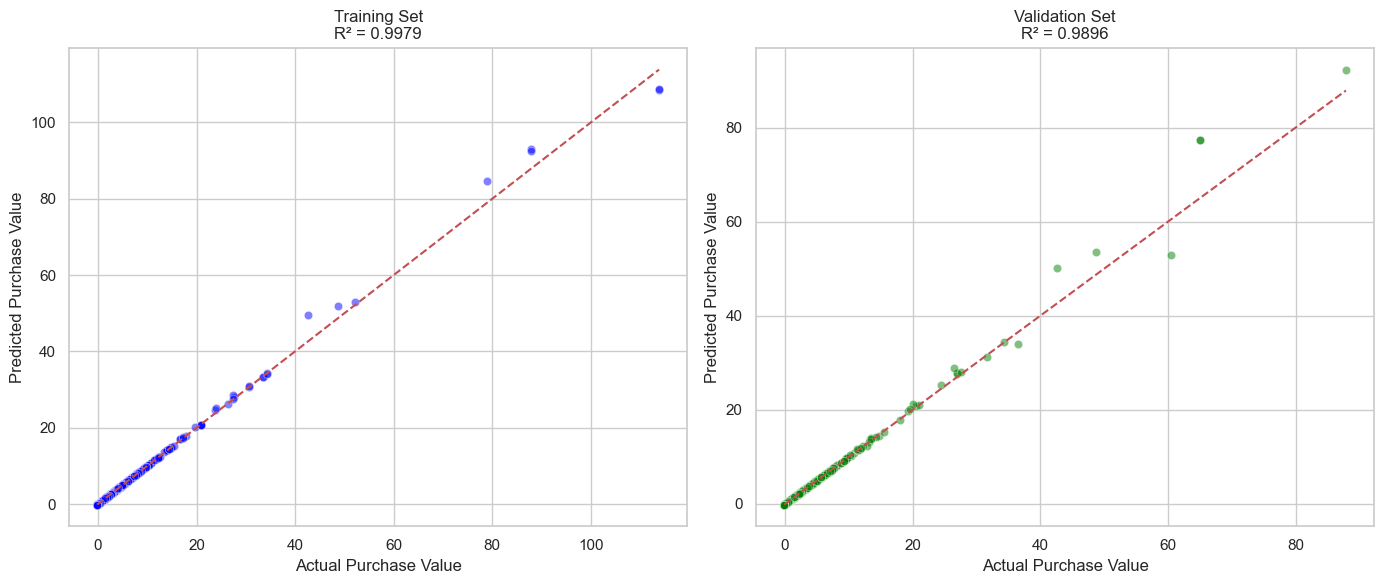

In [284]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Predict on training and validation sets
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

# Set plot style
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(14, 6))

# --- Training set plot ---
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=train_preds, alpha=0.5, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual Purchase Value")
plt.ylabel("Predicted Purchase Value")
plt.title(f"Training Set\nR² = {r2_score(y_train, train_preds):.4f}")

# --- Validation set plot ---
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_val, y=val_preds, alpha=0.5, color='green')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual Purchase Value")
plt.ylabel("Predicted Purchase Value")
plt.title(f"Validation Set\nR² = {r2_score(y_val, val_preds):.4f}")

# Show plot
plt.tight_layout()
plt.show()
